In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
# Data is 1000 rows × 40 columns. Removing irrelevant data like c39. 
df.drop('_c39',axis=1,inplace=True)
df.info()
#No other missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
cn =[]
uv=[]
for c in df:
    if df[c].dtype == 'object':
        cn.append(str(c)) 
        uv.append(df[c].nunique())
tab= pd.DataFrame()
tab['Col_name'] = cn
tab['Value']= uv
            
tab=tab.sort_values('Value',ascending=False)
tab

,Col_name,Value
15,incident_location,1000
0,policy_bind_date,951
8,incident_date,60
19,auto_model,39
6,insured_hobbies,20
18,auto_make,14
5,insured_occupation,14
4,insured_education_level,7
14,incident_city,7
13,incident_state,7


In [9]:
# droping columns based on above result
df = df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1)

In [10]:
#Encoding object data
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in df:
    if df[i].dtypes == 'object':
        s1 = lenc.fit_transform(df[i])
        s1 = pd.DataFrame(s1)
        df[i] = s1
    else:
        continue
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_hobbies              1000 non-null   int32  
 11  insured_relationship         1000 non-null   int32  
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [11]:
#checking for balance in data
df['fraud_reported'].value_counts()
#Data is mbalanced

0    753
1    247
Name: fraud_reported, dtype: int64

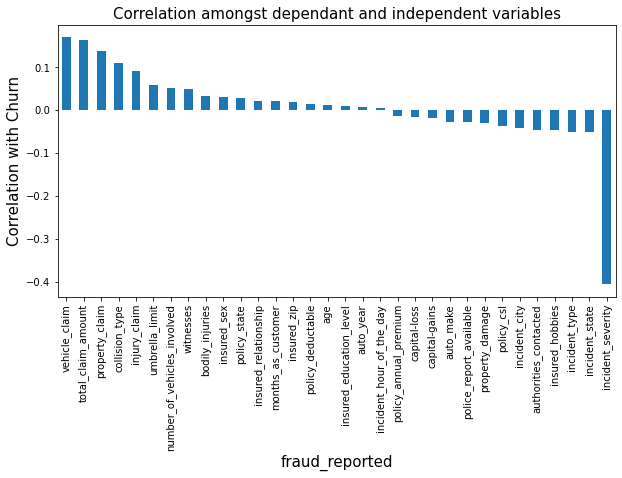

In [12]:
df2 = df.corr()
plt.figure(figsize=(10,5))
df2['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('fraud_reported', fontsize = 15)
plt.ylabel('Correlation with Churn', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

In [14]:
#Correlation is very high with incident_severity. It tapers down after that. 
X = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

from sklearn.feature_selection import SelectKBest, f_classif
bf= SelectKBest(score_func = f_classif, k='all')
fit = bf.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature name', 'Score']
print(feature_scores.nlargest(20,'Score'))

                   Feature name       Score
16            incident_severity  196.960603
29                vehicle_claim   29.718214
26           total_claim_amount   27.463776
28               property_claim   19.327729
15               collision_type   12.252860
27                 injury_claim    8.328776
6                umbrella_limit    3.441452
21  number_of_vehicles_involved    2.689100
18               incident_state    2.644427
14                incident_type    2.539153
24                    witnesses    2.451026
10              insured_hobbies    2.194239
17        authorities_contacted    2.098018
19                incident_city    1.631761
3                    policy_csl    1.382236
23              bodily_injuries    1.146656
8                   insured_sex    0.952144
22              property_damage    0.929077
2                  policy_state    0.865237
25      police_report_available    0.791953


In [19]:
#Picking all K values above 2.5
df = df[['incident_severity', 'vehicle_claim', 'total_claim_amount', 'property_claim', 'collision_type', 'injury_claim',
      'umbrella_limit', 'number_of_vehicles_involved', 'incident_state', 'incident_type', 'fraud_reported']]
df

,incident_severity,vehicle_claim,total_claim_amount,property_claim,collision_type,injury_claim,umbrella_limit,number_of_vehicles_involved,incident_state,incident_type,fraud_reported
0,0,52080,71610,13020,3,6510,0,1,4,2,1
1,1,3510,5070,780,0,780,5000000,1,5,3,1
2,1,23100,34650,3850,2,7700,5000000,3,1,0,0
3,0,50720,63400,6340,1,6340,6000000,1,2,2,1
4,1,4550,6500,650,0,1300,6000000,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,61040,87200,8720,1,17440,0,1,0,2,0
996,0,72320,108480,18080,2,18080,0,1,4,2,0
997,1,52500,67500,7500,3,7500,3000000,3,0,0,0
998,0,36540,46980,5220,2,5220,5000000,1,1,2,0


In [20]:
df.skew()

incident_severity              0.279016
vehicle_claim                 -0.621098
total_claim_amount            -0.594582
property_claim                 0.378169
collision_type                -0.193345
injury_claim                   0.264811
umbrella_limit                 1.806712
number_of_vehicles_involved    0.502664
incident_state                -0.148865
incident_type                  0.101507
fraud_reported                 1.175051
dtype: float64

In [40]:
#Fixing skews of continuous data points.
from scipy.stats import zscore
z=np.abs(zscore(df[['vehicle_claim', 'total_claim_amount', 'umbrella_limit']]))
dfn=df[(z<2.135).all(axis=1)]
dfn.shape

(954, 11)

In [26]:
dfn.skew()

incident_severity              0.273125
vehicle_claim                 -0.632401
total_claim_amount            -0.605067
property_claim                 0.387043
collision_type                -0.206789
injury_claim                   0.258064
umbrella_limit                 1.995772
number_of_vehicles_involved    0.494649
incident_state                -0.172327
incident_type                  0.096045
fraud_reported                 1.202359
dtype: float64

In [41]:
#skew persists after removing the outliers. We cannot afford to remove more as even a slight reduction in z score is resulting in more than 10% data loss
#Using yeo johnson to remove skewness.
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
dfn1 = power.fit_transform(dfn[['vehicle_claim', 'total_claim_amount', 'umbrella_limit']])
dfn1 = pd.DataFrame(dfn1)
dfn1.columns = dfn[['vehicle_claim', 'total_claim_amount', 'umbrella_limit']].columns
dfn.index = dfn1.index
for i in dfn1:
    dfn[i] = dfn1[i]
    
dfn.skew()

incident_severity              0.270454
vehicle_claim                 -0.529360
total_claim_amount            -0.518807
property_claim                 0.385660
collision_type                -0.207067
injury_claim                   0.255900
umbrella_limit                -8.143171
number_of_vehicles_involved    0.495697
incident_state                -0.170153
incident_type                  0.096082
fraud_reported                 1.205795
dtype: float64

In [43]:
#Umbrella limit is very skewed. Removing it as the k score is not very high either.
dfn = dfn.drop(['umbrella_limit'], axis = 1)

In [44]:
X = dfn.drop(['fraud_reported'], axis = 1)
y = dfn['fraud_reported']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, shuffle = True, stratify = y)
!pip install imblearn
!pip install delayed 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)
dtc = DecisionTreeClassifier()
lreg = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
dtc.fit(X_train_new, y_train_new)
lreg.fit(X_train_new, y_train_new)
rfc.fit(X_train_new, y_train_new)
knc.fit(X_train_new, y_train_new)
print(dtc.score(X_test,y_test), lreg.score(X_test,y_test), rfc.score(X_test,y_test), knc.score(X_test,y_test))

0.7238493723849372 0.803347280334728 0.8117154811715481 0.5857740585774058


In [46]:
#Randlom forest is giving the best accuracy. checking for cross validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc, X, y, cv=5).mean())
print(cross_val_score(rfc, X, y, cv=5).mean())
print(cross_val_score(knc, X, y, cv=5).mean())
print(cross_val_score(lreg, X, y, cv=5).mean())

0.7285147423532653
0.7715458804078258
0.715938275006889
0.7599559107192065


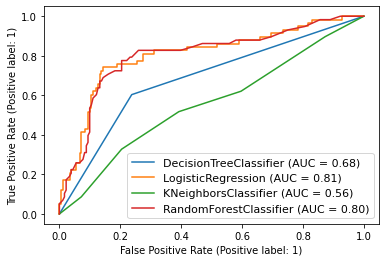

In [50]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dtc, X_test, y_test)
plot_roc_curve(lreg, X_test, y_test, ax=disp.ax_) #ax_ = axes with confusion matrix. look at the axes below
plot_roc_curve(knc, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rfc, X_test, y_test, ax=disp.ax_)
plt.legend(prop = {'size': 11}, loc = 'lower right') # loc gives location of legend
plt.show()

In [54]:
#RFC is giving the best accuracy and area under the curve. Performing gridsearchcv on it.
from sklearn.model_selection import GridSearchCV
params = {'bootstrap': [True, False],
          'n_estimators': [100, 150, 200],
          'max_depth': [13, 15, 17],
         'min_samples_split': [5, 10],
         'min_samples_leaf': [5, 10]}
grd = GridSearchCV(rfc, param_grid = params)
grd.fit(X_train_new, y_train_new)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [13, 15, 17],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 150, 200]})

In [55]:
rfc = grd.best_estimator_
rfc.fit(X_train_new, y_train_new)
rfc.score(X_test,y_test)

0.8117154811715481

In [56]:
#The accuracy remains the same. Saving the model
import joblib
joblib.dump(rfc, 'Fraud.pkl')

['Fraud.pkl']